<a id='initialisation'></a>
___
___
## <font color='coral'>**Appel de l'environment** </font> [▲](#sommaire)

In [14]:
%reset -f
import ipywidgets as widgets
%matplotlib widget
from ipywidgets import Layout, interact
import matplotlib.pyplot as plt
from RVutils import mydict, hdf5_to_dict, Fourier2D
import numpy as np

## Set up rc
plt.rcParams['image.cmap'] = 'RdYlBu_r'
plt.rcParams['axes.formatter.limits'] = (-2,3)
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams.update({"axes.grid" : True})
plt.rcParams['lines.markersize'] = 8
plt.rcParams['lines.markeredgecolor'] = 'k'
plt.rcParams['lines.markeredgewidth'] = 2.0
plt.rc('font',size=18)
me = (0.1,0.1) #Markevery

color_array = ['b','g','r','c','m','y','k','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']

## <font color='coral'>**Chargement des données** </font> 

In [49]:
# q05_spectra = hdf5_to_dict("data/q05_growthrate_2Dspectra.hdf5")
# q15_spectra = hdf5_to_dict("data/q15_growthrate_2Dspectra_aligned.hdf5")
# print(q05_spectra.keys())

## Create custom dictionnary class for spectra
class mydict2(dict):
    def __init__(self, *args, **kwargs):
        super(mydict2, self).__init__(*args, **kwargs)
        self.__dict__ = self
        
        self['Nphi'] = len(self['phig'])-1
        self['Ntheta'] = len(self['thetag'])-1
        self['Phithphisq'] = self['Phithphi']**2

        ## Evolution of mn spectra
        tevol_TFPhi2D = np.zeros((len(self['time']),self['Nphi'],self['Ntheta']))
        for it in range(len(self['time'])):
            tevol_TFPhi2D[it,:,:] = np.abs(Fourier2D(self['Phithphisq'][it,0:self['Nphi']+1,0:self['Ntheta']+1],self['phig'],self['thetag'])[0])
        self['TFPhi2D'] = tevol_TFPhi2D

        ## Coordinates in m,n space
        m2d,n2d = Fourier2D(self['Phithphisq'][-1,0:self['Nphi']+1,0:self['Ntheta']+1],self['phig'],self['thetag'])[1:]
        dm2d = (m2d[1]-m2d[0])//2 ; m2d = m2d#-dm2d
        dn2d = (n2d[1]-n2d[0])//2 ; n2d = n2d#-dn2d
        self['m2d'] = m2d 
        self['n2d'] = n2d 
        self['dm2d'] = dm2d
        self['dn2d'] = dn2d

    def estimate_GRlin2D(self,tinit,tend):
        itinit = np.argmin(np.abs(self['time']-tinit))
        itend  = np.argmin(np.abs(self['time']-tend))
        Gammalin2D = np.log(self['TFPhi2D'][itend,:,:]/self['TFPhi2D'][itinit,:,:])/(tend-tinit)
        return Gammalin2D

## end of mydict2

def hdf5_to_dict2(filename):
    import h5py
    """Load a dictionary of arrays and strings as unicode characters from an HDF5 file."""
    with h5py.File(filename, 'r') as f:
        d = {}
        for k in f.keys():
            v = f[k][()]
            if isinstance(v, bytes):
                d[k] = v.decode('utf-8')
            else:
                d[k] = np.array(v)
    return mydict2(d)

q05_spectra = hdf5_to_dict2("data/q05_growthrate_2Dspectra.hdf5"); q05_spectra['tGR_init'] = 20e3; q05_spectra['tGR_end'] = 27e3
q15_spectra = hdf5_to_dict2("data/q15_growthrate_2Dspectra_aligned.hdf5"); q15_spectra['tGR_init'] = 19e3; q15_spectra['tGR_end'] = 21e3

## <font color='royalblue'>**Tracé du spectre de $\phi^2$** </font> 

qrpeak = 0.96


C:\Users\RV273815\AppData\Local\Temp\ipykernel_5292\3728736472.py:33: RuntimeWarning: divide by zero encountered in divide
  Gammalin2D = np.log(self['TFPhi2D'][itend,:,:]/self['TFPhi2D'][itinit,:,:])/(tend-tinit)
C:\Users\RV273815\AppData\Local\Temp\ipykernel_5292\3728736472.py:33: RuntimeWarning: divide by zero encountered in log
  Gammalin2D = np.log(self['TFPhi2D'][itend,:,:]/self['TFPhi2D'][itinit,:,:])/(tend-tinit)
C:\Users\RV273815\AppData\Local\Temp\ipykernel_5292\979610213.py:25: RuntimeWarning: divide by zero encountered in log10
  p1 = ax1.pcolormesh(m2d,n2d,np.log10(tevol_TFPhi2D[-30,:,:]),vmin=-16,vmax=0)


qrpeak = 2.87


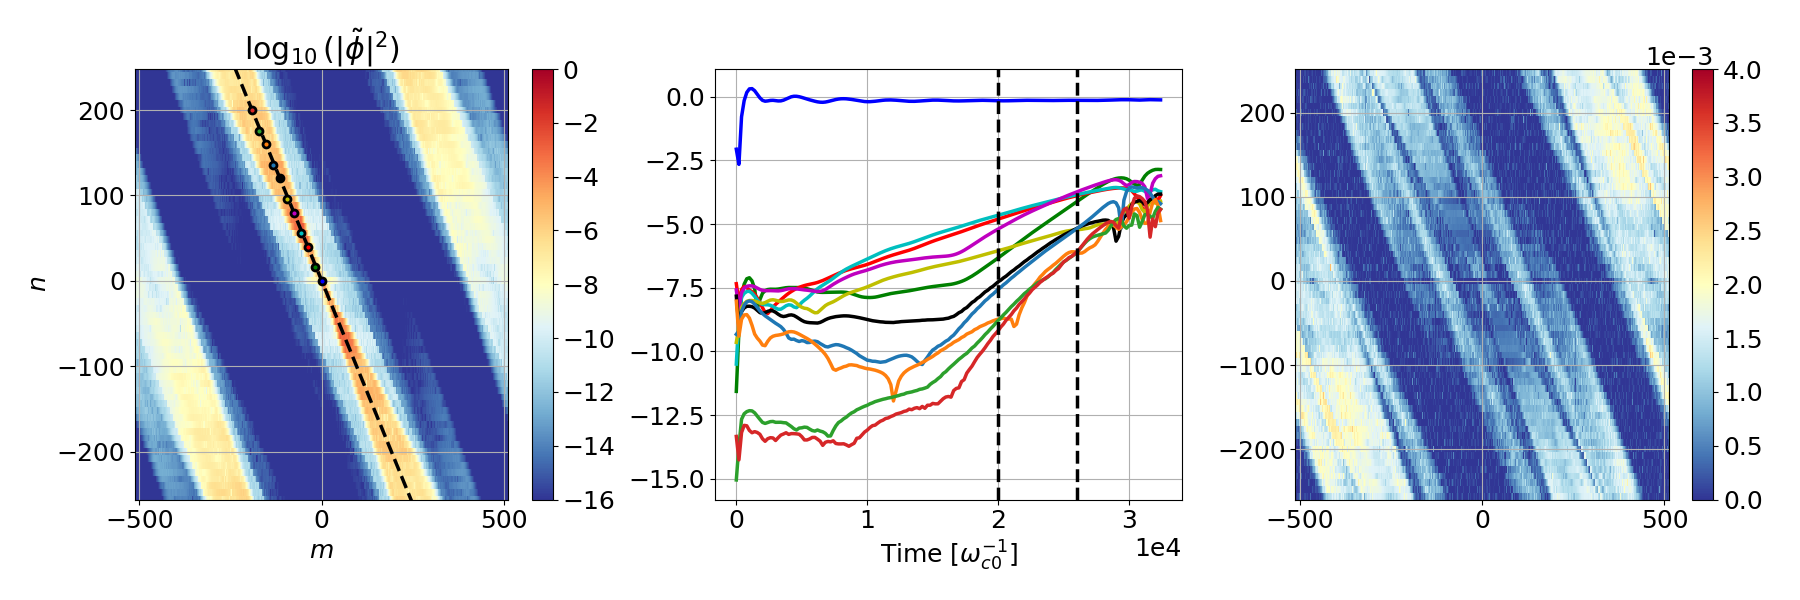

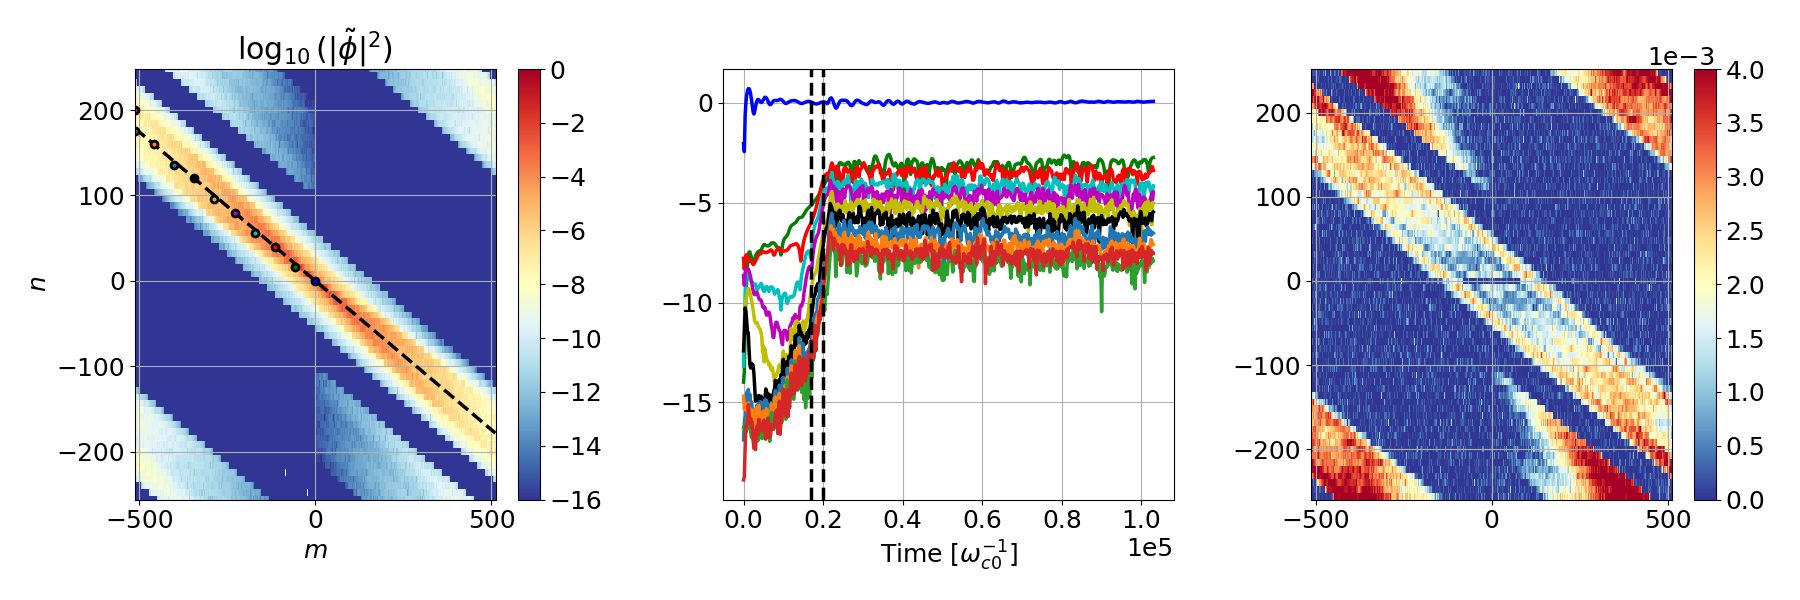

In [50]:
color_array = ['b','g','r','c','m','y','k','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']

q05_spectra['tGR_init'] = 20e3; q05_spectra['tGR_end'] = 26e3
q15_spectra['tGR_init'] = 17e3; q15_spectra['tGR_end'] = 20e3

for iq,q in enumerate([q05_spectra,q15_spectra]):
    print('qrpeak = %.2f' % q['q_rpeak'])

    tevol_TFPhi2D = q['TFPhi2D']
    m2d,n2d = q['m2d'],q['n2d']
    dm2d,dn2d = q['dm2d'],q['dn2d']
    Nphi = q['Nphi']
    Ntheta = q['Ntheta']

    ## Calculate the linear growth rate between tinit and tend
    tinit = q['tGR_init']
    tend  = q['tGR_end']

    Gammalin2D = q.estimate_GRlin2D(tinit,tend)

    fig = plt.figure(figsize=(18,6))

    ## Plot the 2D spectrum
    ax1 = fig.add_subplot(131)
    p1 = ax1.pcolormesh(m2d,n2d,np.log10(tevol_TFPhi2D[-30,:,:]),vmin=-16,vmax=0)    
    fig.colorbar(p1)
    ax1.set_xlabel(r'$m$')
    ax1.set_ylabel(r'$n$')
    ax1.set_title(r'$\log_{10}(|\tilde{\phi}|^2)$')
    ax1.plot(m2d,-m2d/q['q_rpeak'],c='k',ls='--')
    ax1.set_ylim(n2d[0],n2d[-1])

    ## Plot the time evolution of the spectrum at n_ex,m_ex
    ax2 = fig.add_subplot(132)
    ## Add the point n_ex,m_ex to the plot
    for i,C in enumerate([0,20,40,60,80,100,120,140,160,180,200]):
        # n_ex = np.argmin(np.abs(n2d-dn2d-C))
        # m_ex = np.argmin(np.abs(m2d-dm2d+C*q['q_rpeak']))
        n_ex = np.argmin(np.abs(n2d-C))
        m_ex = np.argmin(np.abs(m2d+C*q['q_rpeak']))
        ax1.plot(m2d[m_ex],n2d[n_ex],ls='',marker='o',c=color_array[i],ms=5)
        ax2.plot(q['time'],np.log10(tevol_TFPhi2D[:,n_ex,m_ex]),c=color_array[i])
    ax2.axvline(tinit,c='k',ls='--')
    ax2.axvline(tend,c='k',ls='--')
    ax2.set_xlabel(r'Time $[\omega_{c0}^{-1}]$')

    ## Plot the growth rate
    ax3 = fig.add_subplot(133)
    p3 = ax3.pcolormesh(m2d,n2d,Gammalin2D[:,:],vmin=0,vmax=4e-3) 
    fig.colorbar(p3)

    fig.tight_layout()